In [28]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd

<center><h1> MCD - Ciencia de Datos Responsable </h1><center>
<center><h2> Tarea 3: Modelos interpretables y xAI <h2><center>    

    
## Instrucciones:

- La siguiente tarea es **individual**. 
- La calificación de esta tarea se hará de forma **manual**, es decir, esta tarea no cuenta con test cases automáticos. Es por esto que al hacer entrega de su tarea podrá ver una calificación de "0%" y "Aprobado", independiente del contenido de su notebook.
- Cuenta con intentos ilimitados para el envío de su tarea.
- Ante cualquier duda o consulta pueden comunicarse a través de Foros o Salesforce. 

In [29]:
df = pd.read_csv('adult_data.csv')
df.head()

age  workclass     education  education-num      marital-status  \
0  25.0    Private          11th            7.0       Never-married   
1  38.0    Private       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  Some-college           10.0  Married-civ-spouse   
4  34.0    Private          10th            6.0       Never-married   

          occupation   relationship   race   sex  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black  Male           0.0           0.0   
1    Farming-fishing        Husband  White  Male           0.0           0.0   
2    Protective-serv        Husband  White  Male           0.0           0.0   
3  Machine-op-inspct        Husband  Black  Male        7688.0           0.0   
4      Other-service  Not-in-family  White  Male           0.0           0.0   

   hours-per-week native-country income  
0            40.0  United-States  <=50K  
1            50.0  United-States  <=50K  
2            40.0  United-States   >50K  
3            40.0  United-States   >50K  
4            30.0  United-States  <=50K

### Pregunta 1: Preprocese los datos de Census Income Dataset. Luego, entrene un árbol de decisión y evalúe este modelo desde la perspectiva de la interpretabilidad global. Utilice tanto tree_plot como un gráfico de la importancia de las features (3 ptos). 

**Instrucciones adicionales:** 

- Haga uso de los métodos que le provee el mismo modelo (inherentemente interpretable).

### Pregunta 2: Entrene otro modelo (que no sea interpretable) y realice el procedimiento necesario para obtener explicabilidad local de este modelo utilizando LIME. Obtenga las explicaciones para las predicciones de 3 registros de los datos de entrenamiento. Comente sus resultados (3 ptos).

**Instrucciones adicionales:** 

- Recuerde el uso de LabelEncoder en el pre-procesamiento de sus datos.


### Respuesta pregunta 1

In [30]:
# Revisamos el dataset y sus columnas
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   education       45222 non-null  object 
 3   education-num   45222 non-null  float64
 4   marital-status  45222 non-null  object 
 5   occupation      45222 non-null  object 
 6   relationship    45222 non-null  object 
 7   race            45222 non-null  object 
 8   sex             45222 non-null  object 
 9   capital-gain    45222 non-null  float64
 10  capital-loss    45222 non-null  float64
 11  hours-per-week  45222 non-null  float64
 12  native-country  45222 non-null  object 
 13  income          45222 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.8+ MB


None

In [31]:
for col in df.columns.tolist():
    display(col, df[col].unique())

'age'

array([25., 38., 28., 44., 34., 63., 24., 55., 65., 36., 26., 48., 43.,
       20., 37., 45., 22., 23., 54., 32., 46., 56., 17., 29., 39., 52.,
       18., 21., 42., 33., 30., 47., 41., 19., 69., 50., 31., 59., 49.,
       58., 40., 27., 57., 61., 51., 73., 53., 80., 62., 35., 72., 64.,
       68., 66., 60., 67., 71., 70., 90., 77., 81., 74., 78., 82., 75.,
       85., 76., 89., 83., 79., 88., 87., 84., 86.])

'workclass'

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

'education'

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

'education-num'

array([ 7.,  9., 12., 10.,  6., 15.,  4., 13., 14.,  3., 11.,  5., 16.,
        8.,  2.,  1.])

'marital-status'

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

'occupation'

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

'relationship'

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

'race'

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

'sex'

array(['Male', 'Female'], dtype=object)

'capital-gain'

array([    0.,  7688.,  3103.,  6418.,  7298.,  3908., 14084.,  5178.,
       15024.,  2597.,  2907.,  4650.,  6497.,  5013., 27828.,  4934.,
        4064.,  3674.,  2174., 10605., 99999.,  1055.,   114.,  2580.,
        3411.,  4508.,  4386.,  8614., 13550.,  6849.,  2463.,  3137.,
        2885.,  2964.,  1471., 10566.,  2354.,  1424.,  1455.,  3325.,
        4416., 25236.,  4787.,  2829.,  4865.,  1264.,  1506.,   594.,
       10520.,  3464., 20051.,  4101.,  1797.,  2407.,  3471.,  2653.,
        1086.,  1848., 14344.,  1151.,  2993.,  2290., 15020.,  9386.,
        2202.,  3818.,  2176.,  5455.,  3418., 11678.,  7978.,  7262.,
        6514., 41310.,  3456.,  7430.,  2062., 34095.,  1831.,  6723.,
        5060., 15831.,  2977.,  2346.,  3273.,  2329.,  9562.,  2105.,
        2635.,  2414.,  4931.,  1731.,  6097.,   914.,  7896.,  5556.,
        3781.,  3942.,  2538.,  3887.,  1409., 25124.,  7443.,  5721.,
         401.,  1173.,  4687.,  6767.,   991.,  2036.,  2050.,  2961.,
      

'capital-loss'

array([   0., 1721., 1876., 2415., 1887.,  625., 1977., 2057., 1429.,
       1590., 1485., 2051., 2377., 1672., 1628., 1902., 1741., 2444.,
       1408., 2001., 2042., 1740., 1825., 1848., 1719., 3004., 2179.,
       1573., 2205., 1258., 2339., 1726., 2258., 1340., 1504., 2559.,
       1668., 1974., 1980., 1564., 2547., 2002., 1669., 1617.,  323.,
       1602., 3175., 2472., 1579., 2129., 1735., 2282., 1870., 1911.,
       1092., 1762., 2457., 2231., 2238.,  653., 1138., 2246., 2603.,
       2392., 1510., 1944., 1380., 1421., 3770., 1594.,  213., 2824.,
       2174., 1844., 2149., 1411., 2467., 2163., 1651., 1816., 2206.,
       2352., 1539.,  880.,  810.,  974., 1648., 1755., 3683., 4356.,
       2267., 2080.,  419.,  155., 3900., 2201., 2754.])

'hours-per-week'

array([40., 50., 30., 32., 10., 39., 48., 25., 20., 47., 35., 43., 90.,
       54., 60., 38., 45., 36., 18., 24., 44., 56., 28., 16., 41., 22.,
       55., 14., 33., 37., 12., 70., 15., 75., 52., 84., 42., 80.,  8.,
       68., 99., 65., 17., 72., 53., 96., 21., 46.,  3.,  1., 49., 67.,
       76., 23.,  2., 58., 26., 34.,  4.,  7., 51., 78., 63.,  5., 31.,
       92., 77., 27., 29., 85.,  6., 13., 19., 98., 62., 66., 57., 86.,
       11., 59.,  9., 64., 73., 61., 88., 79., 89., 74., 69., 87., 97.,
       94., 82., 91., 81., 95.])

'native-country'

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

'income'

array(['<=50K', '>50K'], dtype=object)

In [32]:
# Binarizamos la variable 'sex'
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   education       45222 non-null  object 
 3   education-num   45222 non-null  float64
 4   marital-status  45222 non-null  object 
 5   occupation      45222 non-null  object 
 6   relationship    45222 non-null  object 
 7   race            45222 non-null  object 
 8   sex             45222 non-null  int64  
 9   capital-gain    45222 non-null  float64
 10  capital-loss    45222 non-null  float64
 11  hours-per-week  45222 non-null  float64
 12  native-country  45222 non-null  object 
 13  income          45222 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 4.8+ MB


In [34]:
# Separamos X e Y.

X = df.loc[:, df.columns != 'income']
y = df.loc[:, df.columns == 'income']

In [35]:
from sklearn.preprocessing import LabelEncoder

# Ocupamos Label Encoder
to_encode = X.select_dtypes(include='object')
encoders = {}
for catcol in to_encode.columns:
  encoder = LabelEncoder()
  X[catcol] = encoder.fit_transform(X[catcol])
  encoders[catcol] = encoder

X.head()

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_67058/516174812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[catcol] = encoder.fit_transform(X[catcol])
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_67058/516174812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[catcol] = encoder.fit_transform(X[catcol])
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_67058/516174812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

age  workclass  education  education-num  marital-status  occupation  \
0  25.0          2          1            7.0               4           6   
1  38.0          2         11            9.0               2           4   
2  28.0          1          7           12.0               2          10   
3  44.0          2         15           10.0               2           6   
4  34.0          2          0            6.0               4           7   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             3     2    1           0.0           0.0            40.0   
1             0     4    1           0.0           0.0            50.0   
2             0     4    1           0.0           0.0            40.0   
3             0     2    1        7688.0           0.0            40.0   
4             1     4    1           0.0           0.0            30.0   

   native-country  
0              38  
1              38  
2              38  
3              38  
4              38

In [36]:
# Dividimos el dataset en entrenamiento y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Entrenamos un árbol de clasificación con sklearn
from sklearn.tree import DecisionTreeClassifier

max_depth = 3

clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [46]:
# Obtenemos el f1-score como métrica de evaluación
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.585531914893617

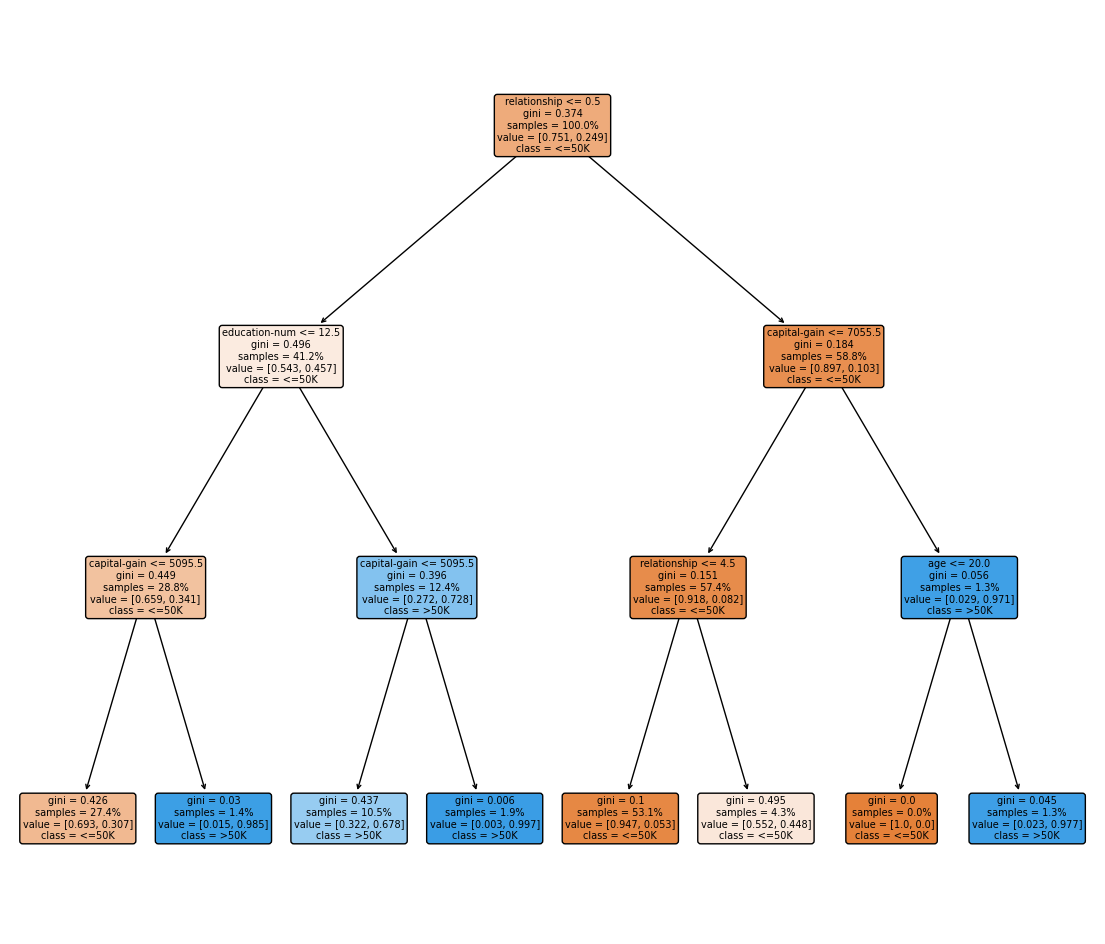

In [47]:
# Utilizamos el método plot_tree para mostrar la estructura del árbol
import matplotlib.pyplot as plt
from sklearn import tree


fig, ax = plt.subplots(1, figsize=(14, 12))
tree.plot_tree(clf, feature_names=X_train.columns.tolist(),
               class_names=['<=50K', '>50K'], max_depth=max_depth,
               proportion=True, filled=True, rounded=True, fontsize=7, ax=ax)
plt.show()

In [48]:
# Por otra parte, graficamos la importancia de las features

feat_importances = clf.feature_importances_
feat_importances

array([0.00115597, 0.        , 0.        , 0.1911651 , 0.        ,
       0.        , 0.53982694, 0.        , 0.        , 0.26785198,
       0.        , 0.        , 0.        ])

In [49]:
# Asignamos indices a cada columna
clf_importance_sorted_idx = np.argsort(feat_importances)
tree_indices = np.arange(0, len(feat_importances))

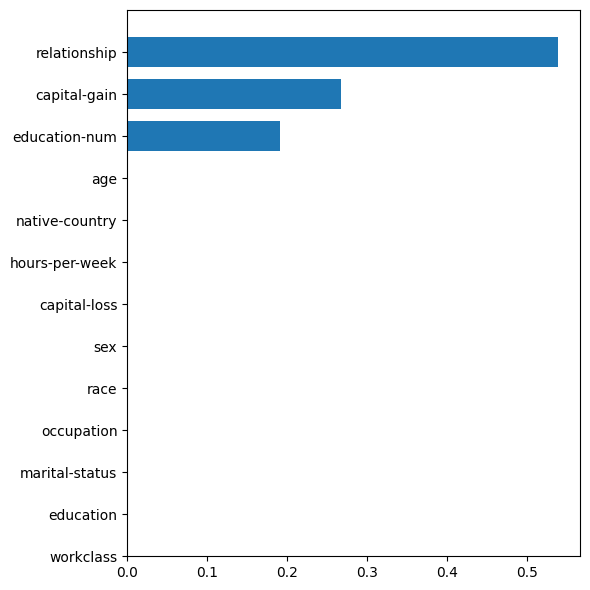

In [50]:
# Asignamos el nombre de las columnas a cada indice y graficamos

fig, ax = plt.subplots(1, figsize=(6, 6))

ax.barh(range(0, len(feat_importances)), feat_importances[clf_importance_sorted_idx][-len(feat_importances):], height=0.7)
ax.set_yticks(range(0, len(feat_importances)))
ax.set_yticklabels(X_train.columns[clf_importance_sorted_idx][-len(feat_importances):])
ax.set_ylim((0, len(feat_importances[-len(feat_importances):])))

fig.tight_layout()
plt.show()

Podemos ver, en primer lugar, que las variables más preponderantes para capturar las varianzas a medida que se ramifica el árbol son `relationship`, `capital-gain`, `education-num` y `age`. Esto, ya que el punto de corte de estas variables están presentes en todos los nodos que no sean hoja y son los que provocan una mayor disminución del gini score, separando entre grupos con menos varianza entre sí. Lo anterior se traduce en que son las features que tienen mayor relevancia al momento de particionar el dataset para encontrar clasificaciones correctas. Se puede ver incluso en el gráfico de importancia de features que las mismas variables comentadas más arriba son aquellas de más importancia en el árbol de clasificación. Lo anterior nos puede dar luces de que incluso bastaría entrenar un árbol de clasificación con tan solo estas cuatro variables y el f1-score no se vería casi afectado.

In [51]:
# Creamos un clasificador alternativo solo con las cuatro features
X_train_subset = X_train[['age', 'relationship', 'capital-gain', 'education-num']]
clf_2 = DecisionTreeClassifier(max_depth=max_depth)
clf_2.fit(X_train_subset, y_train)

f1_score(clf_2.predict(X_test[['age', 'relationship', 'capital-gain', 'education-num']]), y_test)

0.585531914893617

Vemos que el f1-score es prácticamente el mismo, lo que confirma nuestra hipótesis.

### Pregunta 2

Ahora entrenaremos e interpretaremos un modelo con un modelo de ensamble como `RandomForest`, el cual consiste en generar diversos árboles con muestre con reemplazo y luego promediar u obtener la moda de las predicciones, para obtener la clase final.

In [56]:
# Instanciamos y entrenamos un modelo RandomForest con sklearn
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100

clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
clf_rf.fit(X_train, y_train)

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_67058/3757862187.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:
# Ya tenemos las features pre procesadas con Label Encoder, las que vemos a continuación
X.head()

age  workclass  education  education-num  marital-status  occupation  \
0  25.0          2          1            7.0               4           6   
1  38.0          2         11            9.0               2           4   
2  28.0          1          7           12.0               2          10   
3  44.0          2         15           10.0               2           6   
4  34.0          2          0            6.0               4           7   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             3     2    1           0.0           0.0            40.0   
1             0     4    1           0.0           0.0            50.0   
2             0     4    1           0.0           0.0            40.0   
3             0     2    1        7688.0           0.0            40.0   
4             1     4    1           0.0           0.0            30.0   

   native-country  
0              38  
1              38  
2              38  
3              38  
4              38

In [58]:
# Obtenemos el f1-score del random forest
y_pred = clf_rf.predict(X_test)
f1_score(y_test, y_pred)

0.6596267190569745

In [59]:
# Obtenemos los índices y nombres de cada columna categórica
cat_features_idx = [X_train.columns.get_loc(col) for col in to_encode.columns]
cat_features_names = {i: encoders[X_train.columns[i]].classes_ for i in cat_features_idx}

In [60]:
cat_features_names

{1: array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object),
 2: array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 4: array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 5: array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 6: array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 7: array(['Amer-Indian-Eskimo', 'Asian-Pac-Isl

In [61]:
# Utilizamos LIME para explicar las predicciones del modelo
explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',
                                 feature_names=X_train.columns.tolist(),
                                 categorical_features=cat_features_idx,
                                 categorical_names=cat_features_names,
                                 discretize_continuous=True,
                                 discretizer='decile',
                                 kernel_width=5)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


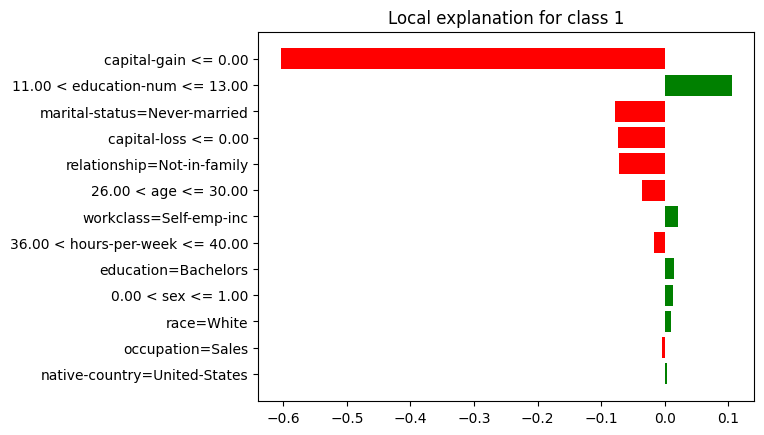

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


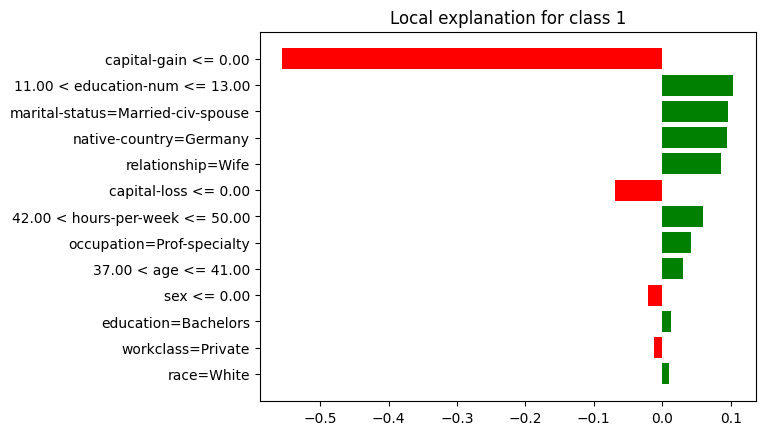

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


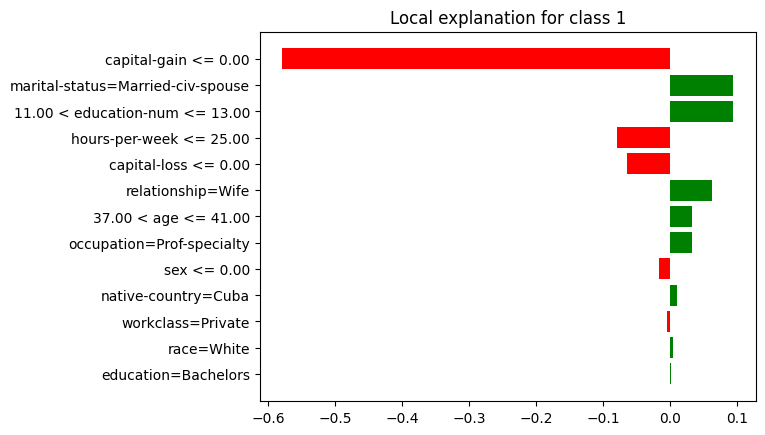

In [73]:
# Obtenemos las explicaciones para tres datos
for i in range(3):
    exp = explainer.explain_instance(X_train.iloc[i,:], clf_rf.predict_proba, num_features=len(X_train.columns))
    exp.as_pyplot_figure()
    plt.show()
    exp.show_in_notebook(show_all=False)

Podemos ver las explicaciones gráficas de cada uno de los datos para cada feature, con respecto a la predicción de un ingreso alto (clase 1).

#### Dato 1

Para el primer dato, vemos que el tener como `capital-gain <= 0`, es decir `capital-gain = 0`, dado que no tiene valores negativos, juega muy en contra en ese dato como para que sea asignado con el valor de la clase positiva. Por otra parte, vemos que el tener un valor de `education-num` entre 11 y 13 aporta positivamente a la probabilidad de que sea asignado a la clase positiva el dato en su predicción y probablemente el efecto de esta variable con valor positivo sumado al efecto de las otras variables de ocupación, sexo, raza y educación, serán preponderantes como para contrarrestar el `capital-gain = 0`, incluso sin considerar las otras variables. Podemos ver la variable `marital-status=Never married` con valor negativo, el cual también aporta en gran medida a que el dato sea probablemente etiquetado como la clase 0 (de bajo ingreso). Sin embargo, se ve que la probabilidad de pertenecer a la clase positiva (`0.68`) es mayor a la de la negativa, pero son probabilidades no extremas, pero etiquetándose en la clase 1 al igual que los otros dos datos.

#### Dato 2

Para el segundo dato, similar al primero, vemos que el tener como `capital-gain = 0`, también es una variable que aporta mucho en ser la clase negativa. De todas maneras, vale la pena mencionar que el valor de `marital-status=Married-civ-spouse` ahora es positiva en LIME, mostrando así que cuando se tiene dicha etiqueta, el dato aporta mayor probabilidad a que la etiqueta sea positiva. De hecho, en este caso solo tenemos `capital-loss=0` como dato adicional a `capital-gain` que aporte a la probabilidad de que el dato sea de la clase 0. Esto se condice con que el dato 2 tiene una probabilidad aún mayor de ser etiquetado en la clase positiva en comparación con el dato 1 y el dato 3, siendo una probabilidad de `0.9` de pertenecer a la clase 1.

#### Dato 3

Para el tercer dato se ve un patrón similar al dato 2 y dato 1, en que `capital-gain=0` aporta bastante en la probabilidad de asignar el valor 0 a la clase, sin embargo se ve que las variables de estado civil, edad, ocupación y número de educación terminan aportando mucho más en promedio a la probabilidad de que el dato sea de la clase positiva, dando un valor 1 de la clase asignada, con una probabilidad de `0.88`. De lo anterior se desprende que la feature `education-num`, `capital-gain` y `relationship` terminan siendo preponderante en sus valores para poder aportar en la asignación de alguna de las clases, lo que es consistente con la importancia de estas features en el ejercicio 1 al utilizar un árbol de clasificación, en vez de utilizar un Random Forest.

